In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('nm_sal_yr_pos_gp_min_ovr_ya_nS.csv',index_col = [0])
df = df[df['yearsAfter'] == 4]
df

,name,salary,year,position,GP,MIN,PIE,overall,yearsAfter,norm_sal
375,Shareef Abdur-Rahim,10130000,2000,Center and Small Forward and Power Forward,81,40.0,13.6,3.0,4,0.516573
377,Ray Allen,10130000,2000,Shooting Guard,82,38.2,14.8,5.0,4,0.516573
380,Shandon Anderson,2200000,2000,Small Forward and Shooting Guard,82,29.2,7.6,54.0,4,0.112188
394,Kobe Bryant,10130000,2000,Shooting Guard and Small Forward,68,41.0,16.0,13.0,4,0.516573
397,Marcus Camby,5750000,2000,Center and Power Forward,63,33.8,15.7,2.0,4,0.293218
...,...,...,...,...,...,...,...,...,...,...
5882,Tomas Satoransky,2870813,2016,Shooting Guard and Point Guard,57,12.6,6.4,32.0,4,0.092716
5885,Mike Scott,3333334,2016,Power Forward,18,10.8,5.8,43.0,4,0.107654
5904,Jared Sullinger,5628000,2016,Power Forward,11,10.7,2.7,21.0,4,0.181763
5930,Dion Waiters,2898000,2016,Shooting Guard,46,30.1,10.0,4.0,4,0.093594


In [3]:

xx = []
yy = []

for ovr in range(1,61):

    df1 = df[df['overall'] == ovr]

    if df1.empty:
        xx.append(0)
        yy.append(0)

    else:
        pie = df1['PIE'].values
        gp = df1['GP'].values
        npie = np.array((pie * gp))
        xx.append(npie.mean())
        if len(df1) < 2:
            yy.append(0.0001)
        else:
            yy.append(npie.std())
display(len(xx) , len(yy))
XX = np.array(xx)
YY = np.array(yy)

ex = sum(YY)/60
ey = sum(XX)/60
display(ex/ey)

display(sum(YY)/60)
display(sum(XX)/60)

60

60

0.42497516081125086

244.0104065995417

574.1756909597756

<Figure size 640x480 with 0 Axes>

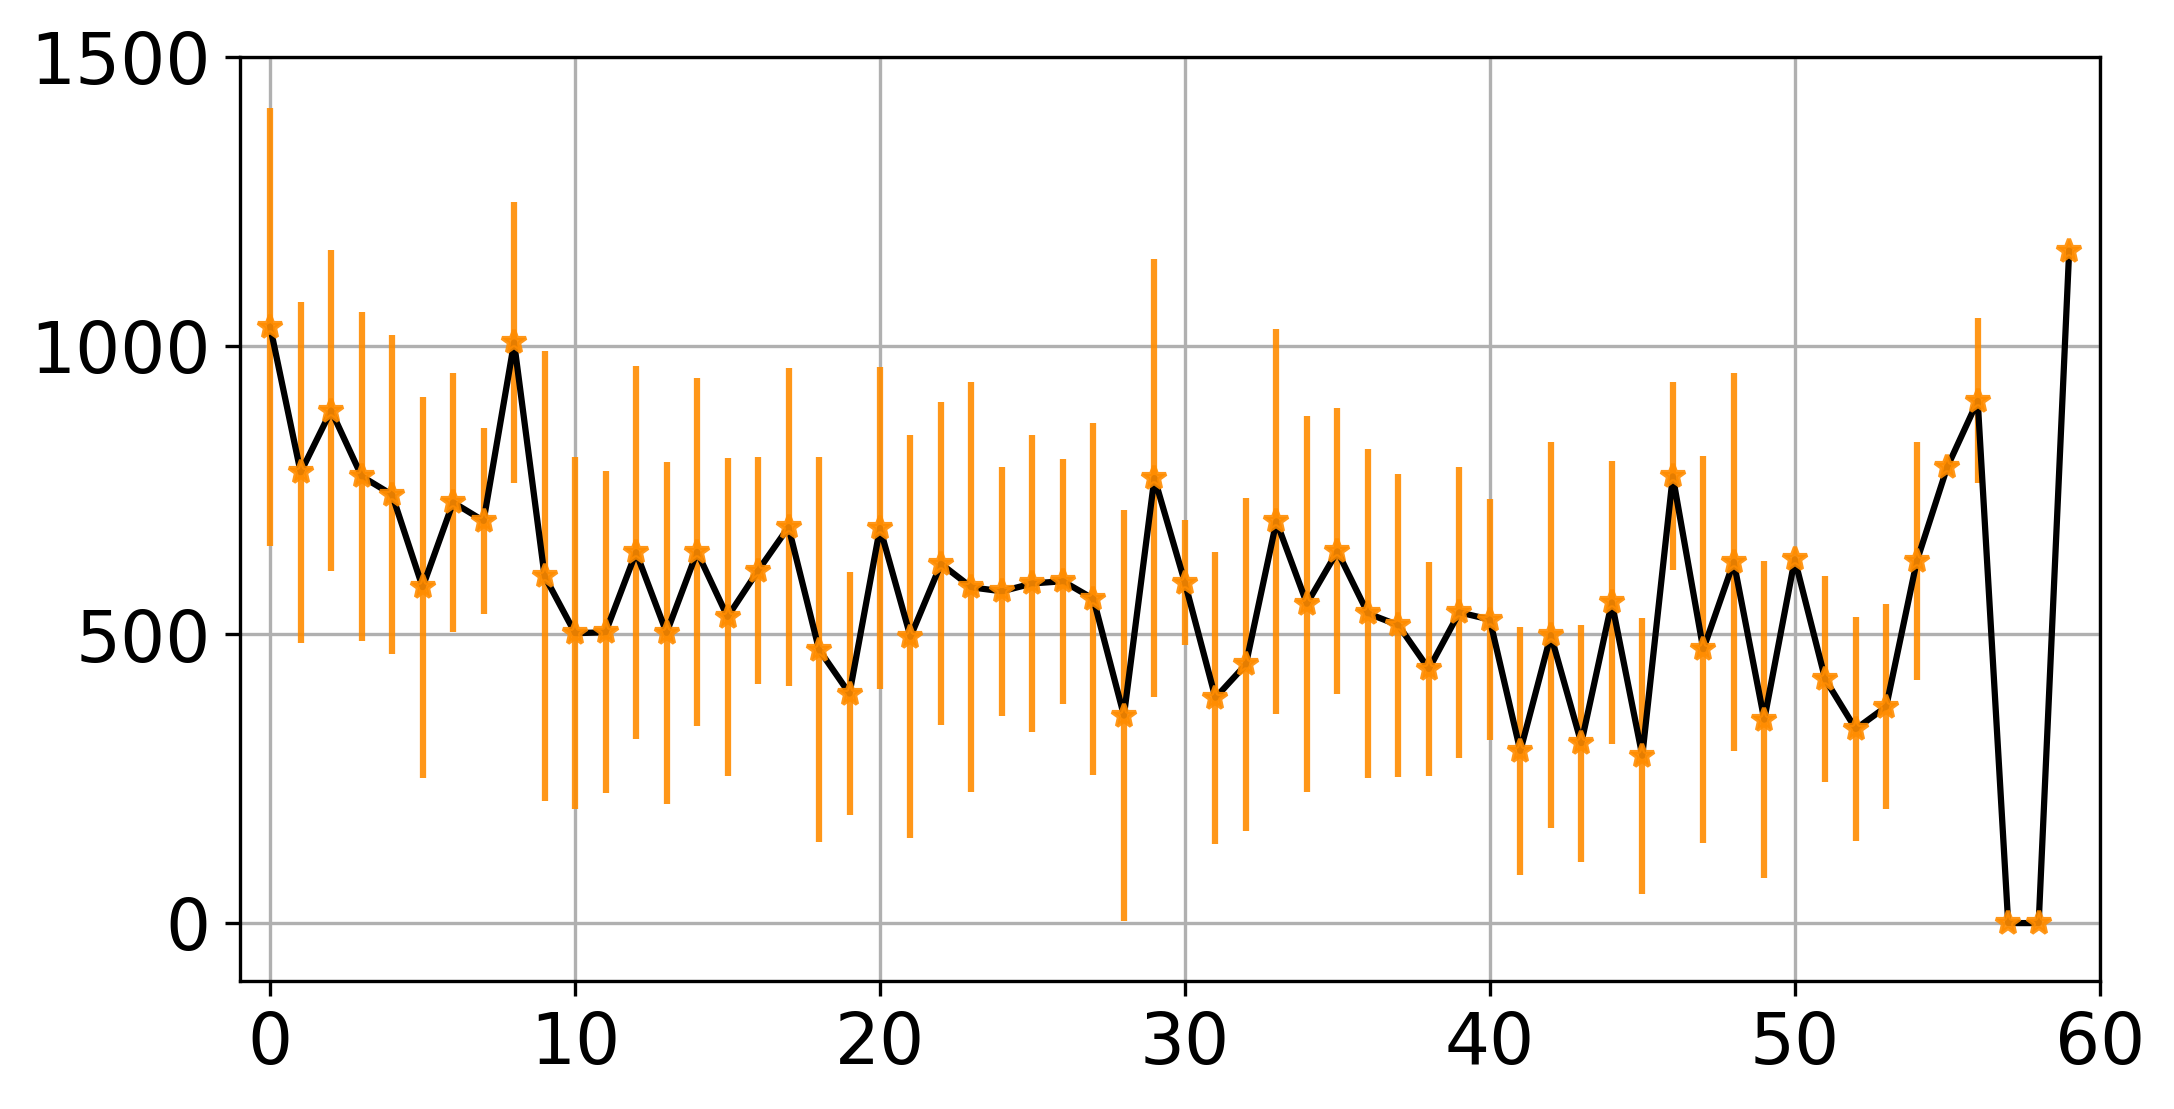

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.clf()
ax = plt.figure(dpi=300,figsize=(8,4)).add_subplot()
x = np.arange(0.0, 60.0, 1)
ax.errorbar(x, xx, yy, alpha = 0.9,ls='none',c='darkorange',marker = '*')
ax.plot(x,xx,c='black')

    
ax.set_xlim(-1, 60)
ax.set_ylim(-100, 1500)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)

ax.grid()
#ax.legend(['Drafted Season', 'Second Season', 'Third Season'])
#plt.legend(loc="upper left", bbox_to_anchor=(1.2,1.0))

#     plt.savefig('SixteenPie.png')
plt.savefig('PIE vs OVR.png')
plt.show()
#5th year salary average vs draft pick
#x-axis is draft pick
#y-axis is normalzied salary to max
